In [5]:
import clustereval as ce
import pandas as pd 
import numpy as np 
import plotnine as pn
import glob
import re
import operator
import os
os.chdir('/data/swamyvs/clustereval/analysis')

In [21]:
pbmc_real_perturbation_results = glob.glob('cluster_metrics/*pbmc_alg*')
pbmc_sim_random_perturb_results = glob.glob('cluster_metrics/*pbmc_simulated_rand*')
pbmc_sim_uniform_perturb_results = glob.glob('cluster_metrics/*pbmc_simulated_uniform*')

calc_metrics.cpython-39-x86_64-linux-gnu.so  __init__.py  __pycache__
cluster.py				     metrics.py   stability.py
data					     purity.py


In [29]:
p = re.compile('-|_')
cols = ['dataset', 'alg', 'knn']
pbmc_real_metrics  = [ 
  pd.read_csv(i, index_col=0).drop(columns='exp_name').assign(** dict(zip(cols, re.split(p, i.split('/')[1])[1::2])))
    for i in pbmc_real_perturbation_results]

In [25]:
cols = ['dataset','stype', 'alg', 'knn']
pbmc_rand_metrics = [ 
  pd.read_csv(i, index_col=0).drop(columns='exp_name').assign(** dict(zip(cols, re.split(p, i.split('/')[1])[1::2]))).assign(dataset = lambda x: x['dataset'] + '-' + x['stype'])
    for i in pbmc_sim_random_perturb_results]

In [26]:
pbmc_uniform_metrics =  [ 
  pd.read_csv(i, index_col=0).drop(columns='exp_name').assign(** dict(zip(cols, re.split(p, i.split('/')[1])[1::2]))).assign(dataset = lambda x: x['dataset'] + '-' + x['stype'])
    for i in pbmc_sim_uniform_perturb_results]

In [36]:
def nunique(i):
    return(len(np.unique(i)))
def summarise_metrics(df_l):
    df = pd.concat(df_l).assign(knn = lambda  x: x.knn.astype(int)).sort_values('knn')
    metrics_summarized = (df
     .groupby(['dataset', 'alg', 'knn'])
     .agg(avg_stability = ('stability', np.mean), avg_purity = ('purity', np.mean),nclusters =('cluster_ids', nunique)  )
     .reset_index(drop=False)
     .assign(total_average = lambda x: (x['avg_stability'] + x['avg_purity'])/2 )
     .sort_values('total_average',ascending=False)
     .reset_index(drop=True)     
    )
    return metrics_summarized 
    

In [40]:
pbmc_real_metric_summary = summarise_metrics(pbmc_real_metrics)
pbmc_rand_metric_summary = summarise_metrics(pbmc_rand_metrics)
pbmc_uniform_metric_summary = summarise_metrics(pbmc_uniform_metrics)

In [45]:
pbmc_real_metric_summary.head(30)

,dataset,alg,knn,avg_stability,avg_purity,nclusters,total_average
0,pbmc,louvain,90,0.928551,0.970803,6,0.949677
1,pbmc,louvain,95,0.928640,0.970319,6,0.949479
2,pbmc,louvain,75,0.929695,0.965954,6,0.947825
3,pbmc,louvain,85,0.925018,0.969742,6,0.947380
4,pbmc,leiden,70,0.918709,0.960385,6,0.939547
5,pbmc,leiden,80,0.920553,0.945794,6,0.933173
6,pbmc,leiden,75,0.918787,0.947254,6,0.933021
7,pbmc,louvain,100,0.928124,0.933738,6,0.930931
8,pbmc,leiden,90,0.923194,0.902734,6,0.912964
9,pbmc,leiden,85,0.906903,0.908780,6,0.907842


In [43]:
pbmc_rand_metric_summary.head(15)

,dataset,alg,knn,avg_stability,avg_purity,nclusters,total_average
0,pbmc-rand,leiden,5,0.218716,0.241741,16,0.230228
1,pbmc-rand,louvain,5,0.192042,0.244556,15,0.218299
2,pbmc-rand,louvain,90,0.076012,0.354326,5,0.215169
3,pbmc-rand,louvain,55,0.072646,0.350493,5,0.211570
4,pbmc-rand,leiden,55,0.057531,0.350090,5,0.203810
5,pbmc-rand,louvain,85,0.089149,0.317783,6,0.203466
6,pbmc-rand,louvain,80,0.087893,0.318379,6,0.203136
7,pbmc-rand,leiden,90,0.056070,0.339729,5,0.197899
8,pbmc-rand,louvain,10,0.156600,0.235480,12,0.196040
9,pbmc-rand,leiden,10,0.166499,0.225364,13,0.195932


In [44]:
pbmc_uniform_metric_summary.head(15)

,dataset,alg,knn,avg_stability,avg_purity,nclusters,total_average
0,pbmc-uniform,leiden,5,0.239182,0.251053,17,0.245117
1,pbmc-uniform,louvain,5,0.215205,0.254891,15,0.235048
2,pbmc-uniform,louvain,100,0.073725,0.352264,5,0.212995
3,pbmc-uniform,louvain,95,0.095472,0.315231,6,0.205351
4,pbmc-uniform,louvain,50,0.108348,0.290612,7,0.199480
5,pbmc-uniform,louvain,60,0.085977,0.311710,6,0.198844
6,pbmc-uniform,louvain,75,0.082683,0.312848,6,0.197766
7,pbmc-uniform,leiden,10,0.172912,0.216868,14,0.194890
8,pbmc-uniform,louvain,70,0.103356,0.284691,7,0.194023
9,pbmc-uniform,louvain,35,0.093042,0.289072,7,0.191057


In [46]:
import umap

In [53]:
def run_umap(df):
    reducer = umap.UMAP()
    return reducer.fit_transform(df)

In [54]:
pbmc_real_data = pd.read_csv('data/pbmc_preproccessed.csv.gz')
pbmc_rand_data = pd.read_csv('data/pbmc_simulated_rand_preproccessed.csv.gz')
pbmc_uniform_data = pd.read_csv('data/pbmc_simulated_uniform_preproccessed.csv.gz')

In [55]:
pbmc_real_umap = run_umap(pbmc_real_data)

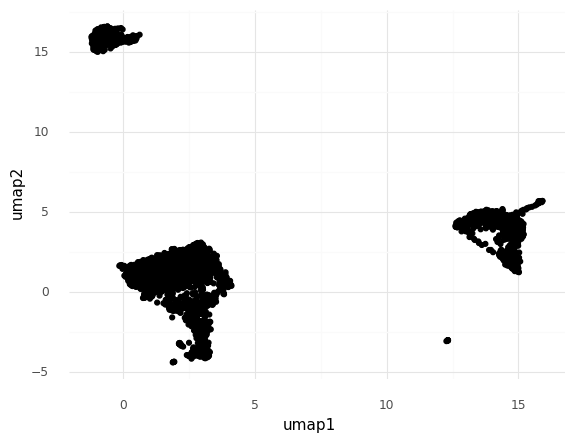

<ggplot: (2932197701139)>

In [59]:
(
    pn.ggplot(pd.DataFrame(pbmc_real_umap, columns = ['umap1', 'umap2'])) + 
    pn.geom_point(pn.aes(x='umap1', y='umap2')) + 
    pn.theme_minimal()
)